In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

dfs = [d0,d1,d2,d3,d4,d5]
balancings = [None, 'undersample', 'oversample', 'smote']

100%|██████████| 180/180 [00:32<00:00,  5.59it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: None
Accuracy: 0.80
Params: (5, 0.1, 5)


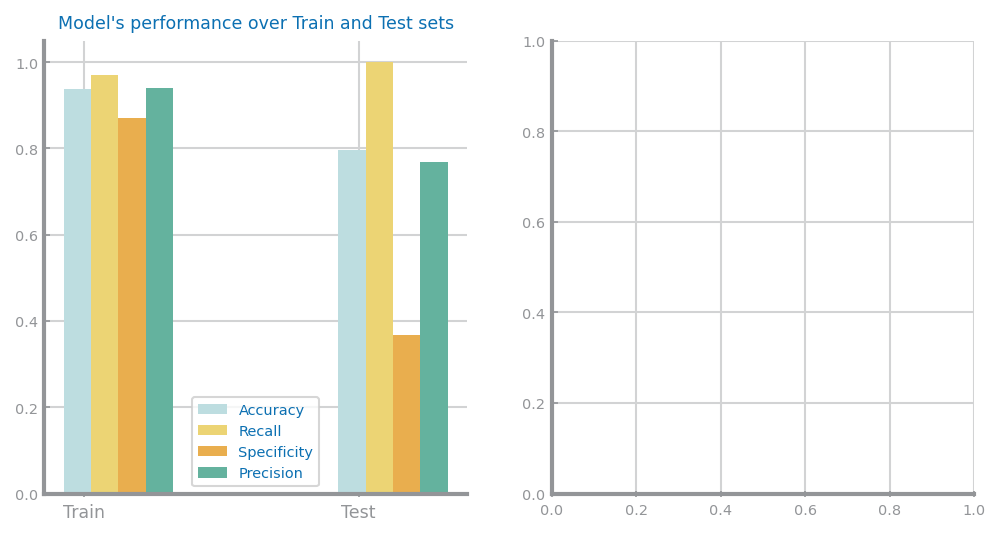

  2%|▏         | 4/180 [00:00<00:05, 30.21it/s]

Results: {'Accuracy': [0.9375, 0.7966101694915254], 'Recall': [0.9693251533742331, 1.0], 'Specificity': [0.8701298701298701, 0.3684210526315789], 'Precision': [0.9404761904761905, 0.7692307692307693]}

------




100%|██████████| 180/180 [00:30<00:00,  5.92it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: undersample
Accuracy: 0.80
Params: (25, 1, 5)


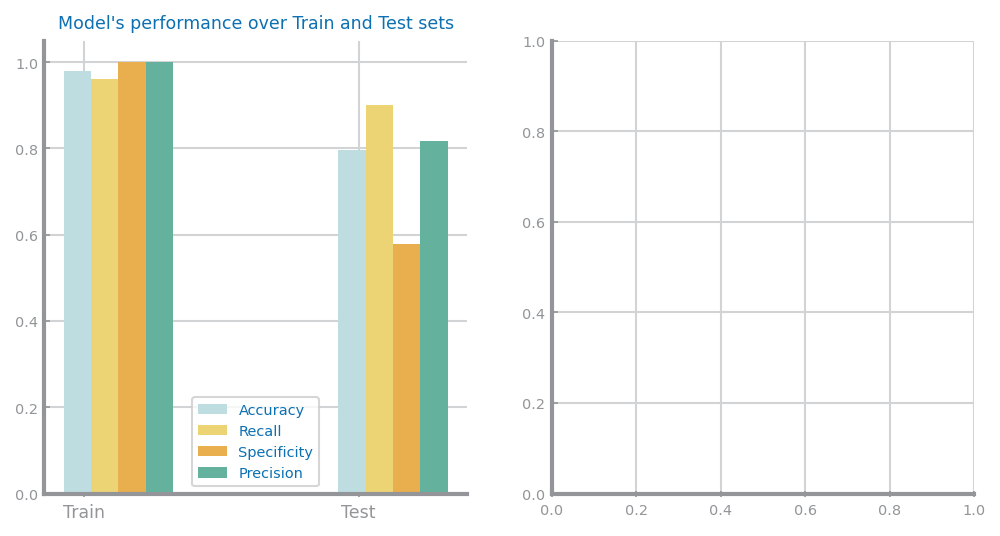

  2%|▏         | 4/180 [00:00<00:06, 28.39it/s]

Results: {'Accuracy': [0.9805194805194806, 0.7966101694915254], 'Recall': [0.961038961038961, 0.9], 'Specificity': [1.0, 0.5789473684210527], 'Precision': [1.0, 0.8181818181818182]}

------




100%|██████████| 180/180 [00:33<00:00,  5.36it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: oversample
Accuracy: 0.76
Params: (5, 0.1, 25)


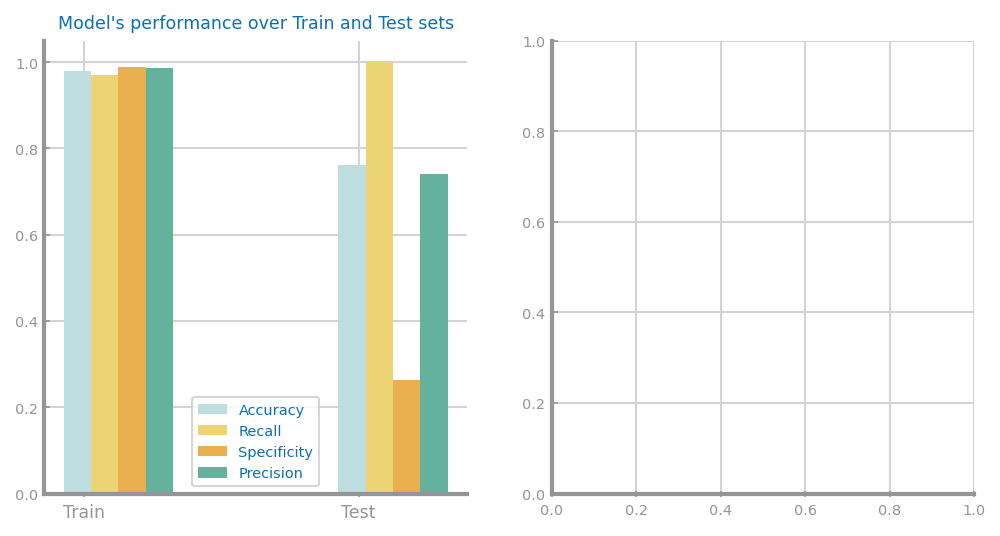

  2%|▏         | 4/180 [00:00<00:08, 21.03it/s]

Results: {'Accuracy': [0.9785276073619632, 0.7627118644067796], 'Recall': [0.9693251533742331, 1.0], 'Specificity': [0.9877300613496932, 0.2631578947368421], 'Precision': [0.9875, 0.7407407407407407]}

------




 24%|██▍       | 44/180 [00:07<00:37,  3.66it/s]

In [ ]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        params, results = RandomForestsKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print("Index: ", i, "balancing:", bal)
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)